In [28]:
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
sns.set()

# Get data from John Hopkins CSSE Git Repository
# Rerun this daily to get updated statistics

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url, error_bad_lines=False)
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url, error_bad_lines=False)
# url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
# recover = pd.read_csv(url, error_bad_lines=False)

# Frequently updated local data source 
# url = 'https://raw.githubusercontent.com/digitalhumanitarians/COVID-19LK/master/time_series-covid-19-Confirmed.csv'
# lk_confirmed = pd.read_csv(url, error_bad_lines=False)

In [29]:
# check for last availble date => Maryland is 9:30 hrs behind local time
last_date=confirmed.columns[confirmed.columns.size-1]
print(last_date)

4/8/20


In [30]:
# sum over countries
confirmedcountry=confirmed.groupby("Country/Region", as_index=False).sum() 

In [31]:
# order by cases
# get top 10 countries => using first column as index
ccs=confirmedcountry.sort_values(by=last_date, ascending=False).head(10)
print('Confirmed Cases') 

print(ccs[['Country/Region',last_date]].to_string(index=False))

Confirmed Cases
 Country/Region  4/8/20
             US  429052
          Spain  148220
          Italy  139422
         France  113959
        Germany  113296
          China   82809
           Iran   64586
 United Kingdom   61474
         Turkey   38226
        Belgium   23403


In [32]:
ccs.head(10)

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20
171,US,37.0902,-95.7129,1,1,2,2,5,5,5,...,161837,188172,213372,243616,275586,308850,337072,366667,396223,429052
156,Spain,40.0000,-4.0000,0,0,0,0,0,0,0,...,87956,95923,104118,112065,119199,126168,131646,136675,141942,148220
84,Italy,43.0000,12.0000,0,0,0,0,0,0,0,...,101739,105792,110574,115242,119827,124632,128948,132547,135586,139422
61,France,91.3624,59.7192,0,0,2,3,3,3,4,...,45170,52827,57749,59929,65202,90848,93773,98963,110065,113959
65,Germany,51.0000,9.0000,0,0,0,0,0,1,4,...,66885,71808,77872,84794,91159,96092,100123,103374,107663,113296
36,China,1083.3367,3684.4197,548,643,920,1406,2075,2877,5509,...,82198,82279,82361,82432,82511,82543,82602,82665,82718,82809
80,Iran,32.0000,53.0000,0,0,0,0,0,0,0,...,41495,44605,47593,50468,53183,55743,58226,60500,62589,64586
175,United Kingdom,270.0299,-482.9247,0,0,0,0,0,0,0,...,22453,25481,29865,34173,38689,42477,48436,52279,55949,61474
170,Turkey,38.9637,35.2433,0,0,0,0,0,0,0,...,10827,13531,15679,18135,20921,23934,27069,30217,34109,38226
16,Belgium,50.8333,4.0000,0,0,0,0,0,0,0,...,11899,12775,13964,15348,16770,18431,19691,20814,22194,23403


In [33]:
# sum of the deaths over countries
deathcountry=death.groupby("Country/Region", as_index=False).sum()

In [34]:
# # sum of the recoveries over countries
# recovercountry=recover.groupby("Country/Region", as_index=False).sum()

In [35]:
# order by cases 
# get top 10 countries => using first column as index
dcs=deathcountry.sort_values(by=last_date, ascending=False).head(10)
print('Deaths')

print(dcs[['Country/Region',last_date]].to_string(index=False)) 

Deaths
 Country/Region  4/8/20
          Italy   17669
          Spain   14792
             US   14695
         France   10887
 United Kingdom    7111
           Iran    3993
          China    3337
        Germany    2349
    Netherlands    2255
        Belgium    2240


In [36]:
# order by recoveries 
# get top 10 countries => using first column as index
# rcs=recovercountry.sort_values(by=last_date, ascending=False).head(10)
# print("Recoveries")

# print(rcs[["Country/Region", last_date]].to_string(index=False))

In [37]:
# top 10 countries by cases
countries=ccs['Country/Region'].values
print(countries)

['US' 'Spain' 'Italy' 'France' 'Germany' 'China' 'Iran' 'United Kingdom'
 'Turkey' 'Belgium']


In [38]:
# top 10 countries by deaths
dcountries=dcs['Country/Region'].values
print(dcountries)

['Italy' 'Spain' 'US' 'France' 'United Kingdom' 'Iran' 'China' 'Germany'
 'Netherlands' 'Belgium']


In [39]:
# top 10 countries by recoveries
# rcountries=rcs["Country/Region"].values
# print(rcountries)

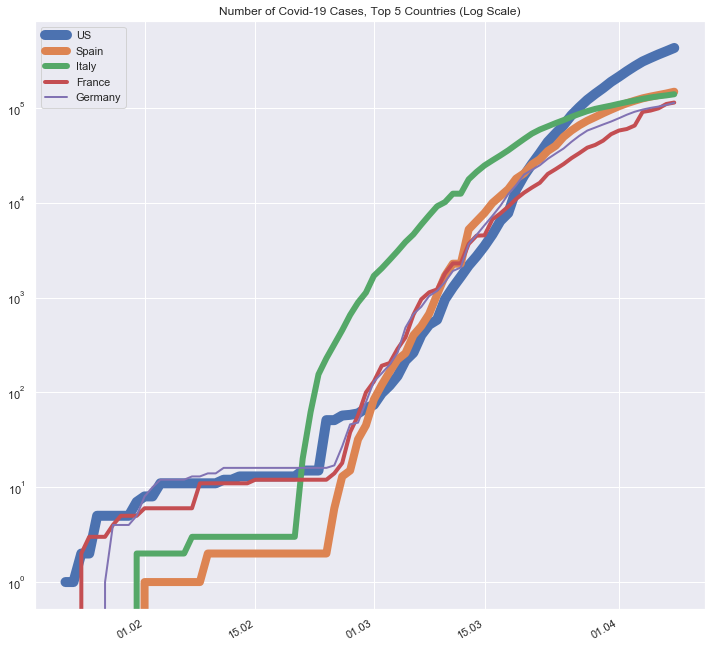

In [40]:
# top 5 countries by number of confirmed cases => Log scale
zerodate = datetime.datetime(2020, 1, 22) # => change this if when running local data
d = confirmed.columns.size-4
date0 = [zerodate + datetime.timedelta(days=i) for i in range(d)]

fig, ax = plt.subplots(figsize=(12, 12)) 
i=1
for country in countries[0:5]:
    scdata=ccs.loc[ccs['Country/Region']==country].values[:,3:][0]
    ax.set_yscale('log')
    ax.plot(date0,scdata, label='%s' % country, linewidth=12-2*i)
    myFmt = DateFormatter("%d.%m")
    ax.xaxis.set_major_formatter(myFmt)
    fig.autofmt_xdate()
    ax.legend(loc='upper left')
    ax.set_title('Number of Covid-19 Cases, Top 5 Countries (Log Scale)')
    i=i+1
plt.show()

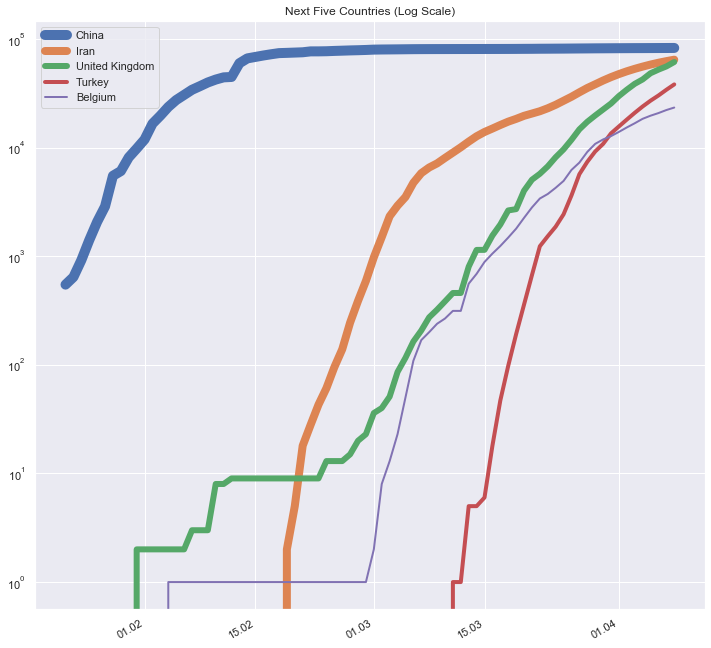

In [41]:
# next 5 countries by number of confirmed cases (5-10) => Log scale

fig, ax = plt.subplots(figsize=(12, 12)) 
i=1
for country in countries[5:10]:
    scdata=ccs.loc[ccs['Country/Region']==country].values[:,3:][0]
    ax.set_yscale('log')
    ax.plot(date0,scdata, label='%s' % country, linewidth=12-2*i)
    myFmt = DateFormatter("%d.%m")
    ax.xaxis.set_major_formatter(myFmt)
    fig.autofmt_xdate()
    ax.legend(loc='upper left')
    ax.set_title('Next Five Countries (Log Scale)')
    i=i+1
plt.show()

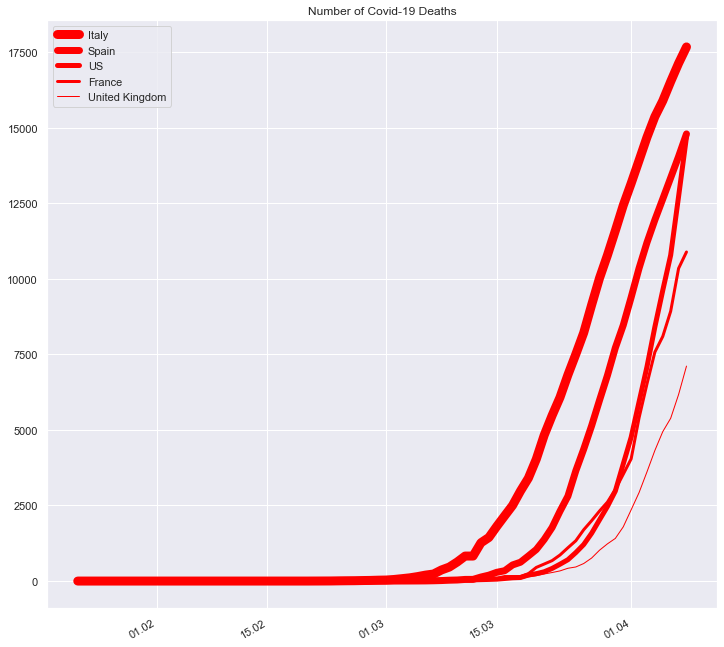

In [42]:
# top 5 countries by number of deaths => Log scale

fig, ax = plt.subplots(figsize=(12, 12)) 
i=1
for country in dcountries[0:5]:
    scdata=dcs.loc[dcs['Country/Region']==country].values[:,3:][0]
    ax.plot(date0,scdata, label='%s' % country, linewidth=11-2*i, color='red')
    myFmt = DateFormatter("%d.%m")
    ax.xaxis.set_major_formatter(myFmt)
    fig.autofmt_xdate()
    ax.legend(loc='upper left')
    ax.set_title('Number of Covid-19 Deaths')
    i=i+1
plt.show()

In [43]:
# top 5 countries by number of recoveries => Log scale

# fig, ax = plt.subplots(figsize=(12, 12)) 
# i=1
# for country in rcountries[0:5]:
#     scdata=rcs.loc[rcs['Country/Region']==country].values[:,3:][0]
#     ax.plot(date0,scdata, label='%s' % country, linewidth=11-2*i, color='green')
#     myFmt = DateFormatter("%d.%m")
#     ax.xaxis.set_major_formatter(myFmt)
#     fig.autofmt_xdate()
#     ax.legend(loc='upper left')
#     ax.set_title('Number of Covid-19 Recoveries')
#     i=i+1
# plt.show()

In [44]:
# cases in Sri Lanka
sldata=confirmed.loc[confirmed['Country/Region']=='Sri Lanka'].values[:,4:][0]
print(sldata)

# updated cases from local source
# sldata = lk_confirmed.loc[lk_confirmed['Location']=='IDH'].values[:,1:][0]
# print(sldata)

[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 6 10 18 28 44 51 60 73 77 82 97 102 102 106
 106 113 117 122 143 146 151 159 166 176 178 185 189]


In [45]:
# regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

LR = LinearRegression()
d = np.arange(sldata.size).reshape(-1,1)

# degree => 7 
quad = PolynomialFeatures(degree=1)
X_quad = quad.fit_transform(d)

LR.fit(X_quad, sldata)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
# next 14 days forecast
from sklearn.metrics import r2_score

d_fit = np.arange(0, sldata.size+14)[:, np.newaxis]
y_poly_fit = LR.predict(quad.fit_transform(d_fit))
quad_r2 = r2_score(sldata, LR.predict(X_quad))

# coefficiants of the regression polynomial
print(LR.coef_)

# R^2 score
print("\nR^2 =", quad_r2)

[0.         2.08466217]

R^2 = 0.6436725775143146


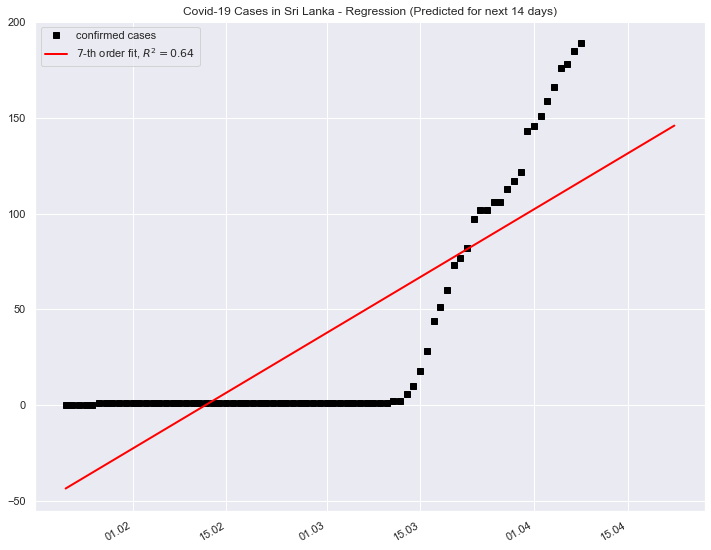

In [47]:
# plot regression for next 14 days

date = [zerodate + datetime.timedelta(days=i) for i in range(len(d_fit))]
fig, ax = plt.subplots(figsize=(12, 10)) 
ax.plot(date0,sldata,'s',color='black',label='confirmed cases')
ax.plot(date, y_poly_fit,label='$7$-th order fit, $R^2=%.2f$' % quad_r2, linestyle='-', color='red', linewidth=2)
ax.legend(loc='upper left')
ax.set_title('Covid-19 Cases in Sri Lanka - Regression (Predicted for next 14 days)')
myFmt = DateFormatter("%d.%m")
ax.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()
plt.show()